In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
plt.style.use('classic')


In [2]:
N = 300     #points
W = 2000 /27211.6      #potential μ_B
L = 100     #length
m = 0.067
delta_x = L/N   #width
alpha = 1*delta_x**2*m  #method parameter

ground state

In [3]:
Psi = np.random.uniform(-1, 1, N)
Psi_prim = np.zeros(N)
Psi[0] = Psi[N-1] = 0
I = 0
sth = 0
energy = np.zeros(200*N)
Potential = np.zeros(N)

# Potential[N/2] = W 


for j in range(0, 200*N-1):
    I = 0
    sth = 0
    for i in range(1, N-1):
        Psi_prim[i] = Psi[i] - alpha* (-1/(2*m) * 1  * (Psi[i+1] + Psi[i-1] - 2*Psi[i])/delta_x**2  + W*Psi[i])

    for i in range(1, N-1):
        I = I + np.abs(Psi_prim[i])**2 * delta_x

    for i in range(1, N-1):
        Psi_prim[i] = Psi_prim[i]/np.sqrt(I)
        
    for i in range(1, N-1):
        Psi[i] = Psi_prim[i]

    for i in range(1, N-1):
        sth = sth + Psi[i] * (-1/(2*m) * 1  * (Psi[i+1]+ Psi[i-1] - 2*Psi[i])/(delta_x**2) + W * Psi[i]) *delta_x

    energy[j] = sth  



Text(0, 0.5, 'Ψ')

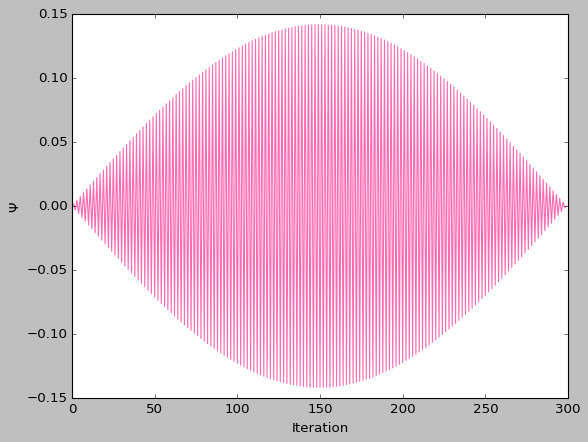

In [4]:
plt.subplot()
plt.plot(Psi ,color = 'hotpink')
plt.xlabel('Iteration')
plt.ylabel("Ψ")

Text(0, 0.5, 'Energy [μ_B]')

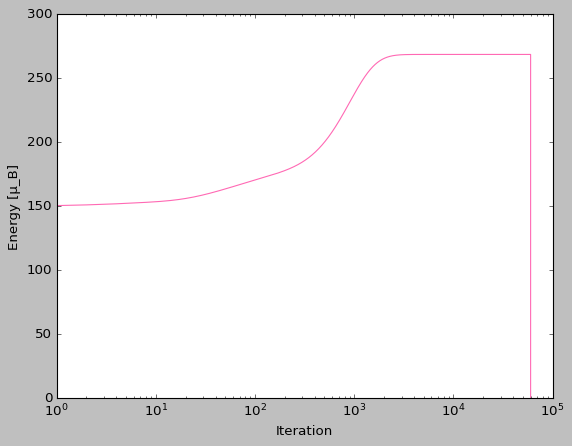

In [5]:
plt.plot(energy, color = 'hotpink')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel("Energy [μ_B]")


first exciteted state

In [6]:
Psi2 = np.random.uniform(-1, 1, N)
Psi2_prim = np.zeros(N)
Psi2[0] = Psi2[N-1] = 0
I = 0
c1 = 0
# J = np.linspace(0, 1, 1000*N)
energy2 = np.zeros(200*N)


for j in range(0, 200*N-1):
    I = 0
    sth = 0
    for i in range(1, N-1): 
        Psi2_prim[i] = Psi2[i] - alpha* (-1/(2*m) * 1  * (Psi2[i+1] + Psi2[i-1] - 2*Psi2[i])/delta_x**2  + W*Psi2[i])

    for i in range(1, N-1): 
        I = I + np.abs(Psi2_prim[i])**2 * delta_x

    for i in range(1, N-1):
        Psi2_prim[i] = Psi2_prim[i]/np.sqrt(I)
        c1 = c1 + Psi[i]*Psi2_prim[i]*delta_x

    for i in range(1, N-1):
        Psi2_prim[i] = Psi2_prim[i] - c1*Psi[i]
    
    for i in range(1, N-1): 
        I = I + np.abs(Psi2_prim[i])**2 * delta_x  
    
    for i in range(1, N-1):
        Psi2_prim[i] = Psi2_prim[i]/np.sqrt(I)
        c1 = c1 + Psi[i]*Psi2_prim[i]*delta_x     

    for i in range(1, N-1):
        Psi2[i] = Psi2_prim[i]
    for i in range(1, N-1):
        sth = sth + Psi2[i] * (-1/(2*m) * 1  * (Psi2[i+1]+ Psi2[i-1] - 2*Psi2[i])/(delta_x**2) + W * Psi2[i]) *delta_x
        
    energy2[j] = sth


print(energy2)

Text(0, 0.5, 'Ψ')

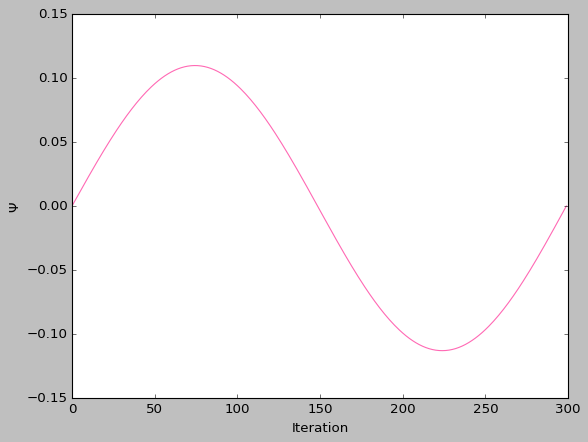

In [ ]:
plt.plot(Psi2, color = 'hotpink')
plt.xlabel('Iteration')
plt.ylabel("Ψ")

Text(0, 0.5, 'Energy [μ_B]')

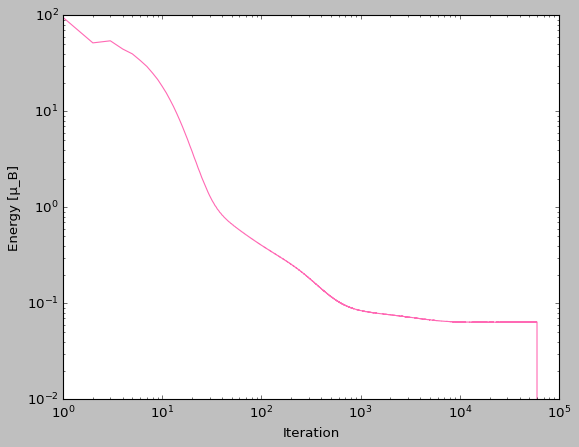

In [ ]:
plt.plot(energy2, color = 'hotpink')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel("Energy [μ_B]")